In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(23454)

In [3]:
mean_vec1=np.array([0,0,0])
cov_mat=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1=np.random.multivariate_normal(mean_vec1,cov_mat,100)

In [4]:
mean_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2=np.random.multivariate_normal(mean_vec2,cov_mat,100)

In [5]:
from mpl_toolkits.mplot3d import Axes3D, proj3d

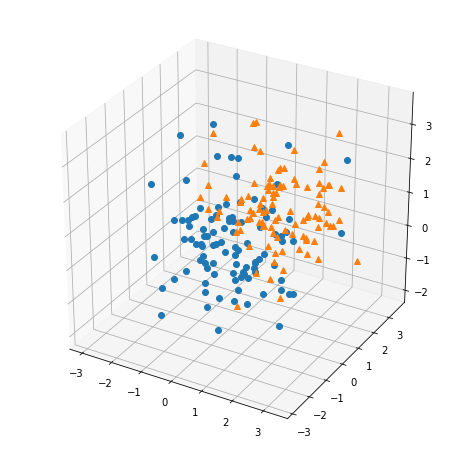

In [6]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1],class2[:,2],'^')
plt.show()

In [7]:
pca=PCA(n_components=2)

In [8]:
all_data=np.concatenate((class1,class2))

In [9]:
transform_data=pca.fit_transform(all_data)
transform_data.shape

(200, 2)

In [10]:
#--ye vo nayi direction ya axes hai jo sabse top pr max info hain inke pas

pca.components_

array([[-0.65425074, -0.6229707 , -0.42879306],
       [ 0.09433635, -0.62977468,  0.77102821]])

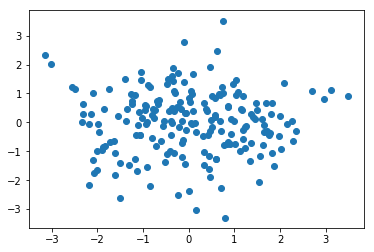

In [11]:
plt.scatter(transform_data[:,0],transform_data[:,1])
plt.show()

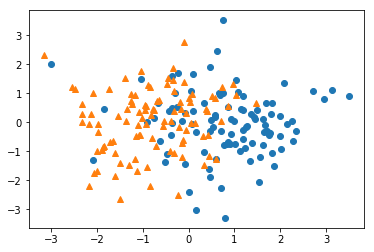

In [12]:
#--different color me show krkke dekhna both class k data ko 
plt.plot(transform_data[0:100,0],transform_data[0:100,1],'o')
plt.plot(transform_data[100:200,0],transform_data[100:200,1],'^')
plt.show()

In [13]:
#--data ko inverse krke dekhte hain--tye ab 2D se vaps 3D me aa gaya but same ni hai approx hai

x_approx=pca.inverse_transform(transform_data)
x_approx

array([[-0.084886  ,  0.26649603, -0.02469156],
       [-0.54859634, -0.2193973 , -0.2848931 ],
       [-0.73658029,  0.11340575, -0.91249948],
       [ 0.23701444,  1.01966227, -0.25392006],
       [-0.1059054 ,  0.50587642, -0.29411348],
       [-0.37806291, -0.60607411,  0.36799535],
       [-0.15175452, -0.40977429,  0.5352282 ],
       [ 0.20712389,  0.11577955,  0.58925884],
       [ 0.02553629, -0.97555627,  1.37540333],
       [ 0.94521198, -0.18364632,  2.06073927],
       [ 0.3909948 , -1.33525964,  2.31238435],
       [ 0.32295977,  2.08889776, -1.17072052],
       [-0.01952473,  0.59980545, -0.24900944],
       [ 0.20405222, -0.42413178,  1.11647129],
       [-0.61891006, -0.27191105, -0.34520597],
       [-0.26933912, -0.07847574,  0.02130873],
       [-0.24103741,  0.02064323, -0.03126977],
       [ 0.90240277,  1.3739766 ,  0.4573979 ],
       [-0.05997203,  0.53517879, -0.24978267],
       [ 0.40566827, -2.08452415,  3.07420688],
       [-0.13618914, -0.72641856,  0.872

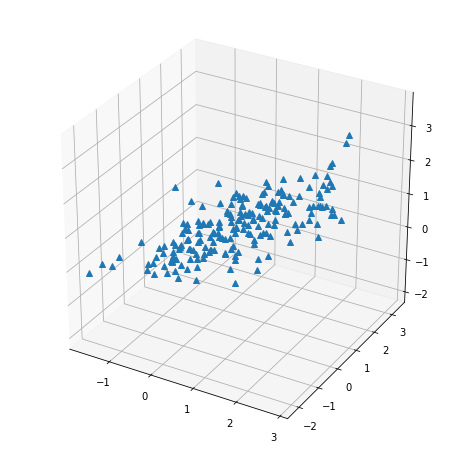

In [14]:
#-ab reverse data ko plot rke dekhte h--ye hai to 3D me but pura data ek hi 2D plane se liya hai vapas to ye plane me hi hoga

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(x_approx[:,0],x_approx[:,1],x_approx[:,2],'^')
plt.show()

In [15]:
#--ye hame ni pta ki plane me hai ya 3D me
#--iske liye plane ki equation satisfies kra k dekhte h
#--ax1+bx1+cx1=1
#-- manually humne a,b,c ki value nikal k dekh skte hain

In [16]:
#---code for PCA
#--no. of feature agar N hai to cavariance bhi N*N hogi matrix
#--so uske liye transpose krna pdega

all_data=np.transpose(all_data)
covariance=np.cov(all_data)
covariance.shape


(3, 3)

In [17]:
eigen_val,eigen_vec=np.linalg.eig(covariance)
eigen_val, eigen_vec

(array([1.68541406, 1.0234124 , 1.19570707]),
 array([[ 0.65425074,  0.75037099,  0.09433635],
        [ 0.6229707 , -0.463995  , -0.62977468],
        [ 0.42879306, -0.47079933,  0.77102821]]))

In [51]:
#-- ab ek tuple me store kr lenge eigen value correspond o that vector

eigen_pair=[]

for i in range(len(eigen_val)):
    eig_vec=eigen_vec[:,i]
    eigen_pair.append((eigen_val[i],eig_vec))
    
eigen_pair.sort(reverse=True)
eigen_pair

[(1.6854140583596433, array([0.65425074, 0.6229707 , 0.42879306])),
 (1.1957070674336612, array([ 0.09433635, -0.62977468,  0.77102821])),
 (1.023412397090736, array([ 0.75037099, -0.463995  , -0.47079933]))]

In [64]:
eigen_pair[0][1][1]


0.6229706981271054

In [86]:
#--ye inbuilt k jaisa hi hai check krne k liye

pca.components_

array([[-0.65425074, -0.6229707 , -0.42879306],
       [ 0.09433635, -0.62977468,  0.77102821]])

In [87]:
pca.explained_variance_

array([1.68541406, 1.19570707])